In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create set of random lattitude and longitude
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)
langs=np.random.uniform(low=-90.000,high=90.000,size=1500)
lat_langs=zip(lats,langs)
lat_langs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_langs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

39.50065280036165 -81.0337102037755
89.3918348084249 63.19442769128878
86.68089795173051 -7.245282813010348
62.80904883815825 54.93485406419933
88.37714917943845 -55.84018249936312
-21.03024683936603 16.912449909749483
-82.01460357960337 -4.274460899302738
13.519398013022979 -67.35589187804268
8.38005220505255 12.177305719830414
8.44297827732764 -76.5582477261555
47.38075276952296 9.091744023527994
69.91057102699568 -28.534053516924196
19.978095183811703 50.26052166534433
-43.08787915623205 52.91004428641281
75.63936941431572 69.91260328982304
-53.75455062557803 -48.68832655983789
-16.58870365531095 38.32623152407774
-32.30608858549643 -54.004639419892186
61.291983504677944 -16.31823008961267
-7.634713617185582 38.27915643579428
65.93044818543069 -7.949591992726255
-32.75711386271415 77.74110573083698
82.77076754713892 -12.850373752640209
-59.37371937102722 63.59909473131805
67.51269115798056 84.21689597822527
44.17727548197237 0.5829407758487548
-30.977886884078373 -40.287290606937894

In [5]:
from citipy import citipy

In [6]:
#create a list for holding a city
cities=[]
#identify the nearest city for each longitude and llatitude
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    #if the city is unique we will add in city llist
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

631

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [8]:
#import requests and weather api key
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [9]:
#build the url for openweathermap
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +weather_api_key
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#url ="https://api.openweathermap.org/data/2.5/weather?la&appid=&units=Imperial" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marietta
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | voyvozh
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | otjiwarongo
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | rincon
Processing Record 9 of Set 1 | yola
Processing Record 10 of Set 1 | necocli
Processing Record 11 of Set 1 | oberuzwil
Processing Record 12 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 13 of Set 1 | abu samrah
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | yar-sale
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | mocuba
Processing Record 18 of Set 1 | melo
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | utete
Processing Reco

City not found. Skipping...
Processing Record 35 of Set 4 | hobyo
Processing Record 36 of Set 4 | touros
Processing Record 37 of Set 4 | sargatskoye
Processing Record 38 of Set 4 | yakshur-bodya
City not found. Skipping...
Processing Record 39 of Set 4 | pitmoaga
Processing Record 40 of Set 4 | gubkinskiy
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | keflavik
Processing Record 44 of Set 4 | roald
Processing Record 45 of Set 4 | inhambane
Processing Record 46 of Set 4 | trapani
Processing Record 47 of Set 4 | vagay
Processing Record 48 of Set 4 | mehamn
Processing Record 49 of Set 4 | garowe
Processing Record 50 of Set 4 | grand gaube
Processing Record 1 of Set 5 | sistranda
Processing Record 2 of Set 5 | thinadhoo
Processing Record 3 of Set 5 | caravelas
Processing Record 4 of Set 5 | banda aceh
Processing Record 5 of Set 5 | teguise
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | manicore
Proc

Processing Record 25 of Set 8 | skelleftea
Processing Record 26 of Set 8 | potgietersrus
City not found. Skipping...
Processing Record 27 of Set 8 | bathsheba
Processing Record 28 of Set 8 | pangnirtung
Processing Record 29 of Set 8 | toamasina
Processing Record 30 of Set 8 | robertsport
Processing Record 31 of Set 8 | turukhansk
Processing Record 32 of Set 8 | kotido
Processing Record 33 of Set 8 | chakwal
Processing Record 34 of Set 8 | kyshtovka
Processing Record 35 of Set 8 | artyom
Processing Record 36 of Set 8 | ronne
Processing Record 37 of Set 8 | dharmadam
Processing Record 38 of Set 8 | horten
Processing Record 39 of Set 8 | ilo
Processing Record 40 of Set 8 | henderson
Processing Record 41 of Set 8 | barcelos
Processing Record 42 of Set 8 | trelew
Processing Record 43 of Set 8 | weston
Processing Record 44 of Set 8 | pesqueira
Processing Record 45 of Set 8 | kedrovyy
Processing Record 46 of Set 8 | the valley
Processing Record 47 of Set 8 | krapivinskiy
Processing Record 48 

Processing Record 14 of Set 12 | hemnes
City not found. Skipping...
Processing Record 15 of Set 12 | ayagoz
Processing Record 16 of Set 12 | severodvinsk
Processing Record 17 of Set 12 | nefteyugansk
Processing Record 18 of Set 12 | sanchez
Processing Record 19 of Set 12 | kosh-agach
Processing Record 20 of Set 12 | lyngseidet
Processing Record 21 of Set 12 | moussoro
Processing Record 22 of Set 12 | khormuj
City not found. Skipping...
Processing Record 23 of Set 12 | arthur
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | kampene
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | salta
Processing Record 28 of Set 12 | bereda
Processing Record 29 of Set 12 | tambopata
Processing Record 30 of Set 12 | radchenko
Processing Record 31 of Set 12 | cascais
Processing Record 32 of Set 12 | kaputa
Processing Record 33 of Set 12 | lethem
Processing Record 34 of Set 12 | shihezi
Processing Record 35 of Set 12 | olafsvik
Processing 

In [11]:
#create a dataframe

#city=json.load(open('json_file.json'))
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

                          
                          

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marietta,33.9526,-84.5499,41.81,81,100,16.11,US,2022-11-13 04:36:51
1,Voyvozh,62.8920,54.9635,16.70,94,100,9.17,RU,2022-11-13 04:38:16
2,Upernavik,72.7868,-56.1549,12.20,83,19,10.74,GL,2022-11-13 04:38:17
3,Otjiwarongo,-20.4637,16.6477,59.14,28,1,6.08,NA,2022-11-13 04:38:17
4,Hermanus,-34.4187,19.2345,56.80,78,6,8.21,ZA,2022-11-13 04:38:17
5,Rincon,32.2960,-81.2354,69.85,93,40,6.91,US,2022-11-13 04:38:17
6,Yola,9.2000,12.4833,71.71,36,42,0.92,NG,2022-11-13 04:38:18
7,Necocli,8.4234,-76.7860,74.97,93,100,10.16,CO,2022-11-13 04:38:18
8,Oberuzwil,47.4308,9.1272,41.22,86,60,0.38,CH,2022-11-13 04:38:18
9,Abu Samrah,35.3029,37.1841,58.91,53,3,5.64,SY,2022-11-13 04:38:19


In [12]:
#assign the column 
new_col_order=["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_col_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marietta,US,2022-11-13 04:36:51,33.9526,-84.5499,41.81,81,100,16.11
1,Voyvozh,RU,2022-11-13 04:38:16,62.8920,54.9635,16.70,94,100,9.17
2,Upernavik,GL,2022-11-13 04:38:17,72.7868,-56.1549,12.20,83,19,10.74
3,Otjiwarongo,NA,2022-11-13 04:38:17,-20.4637,16.6477,59.14,28,1,6.08
4,Hermanus,ZA,2022-11-13 04:38:17,-34.4187,19.2345,56.80,78,6,8.21


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
#scatter plot graph
# Extract relevant fields from the DataFrame for plotting.
scatterplot=["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[scatterplot]
city_data_df.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,33.9526,41.81,81,100,16.11
1,62.8920,16.70,94,100,9.17
2,72.7868,12.20,83,19,10.74
3,-20.4637,59.14,28,1,6.08
4,-34.4187,56.80,78,6,8.21


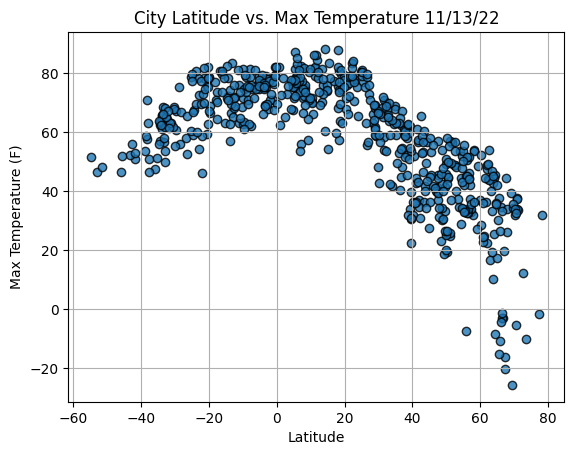

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

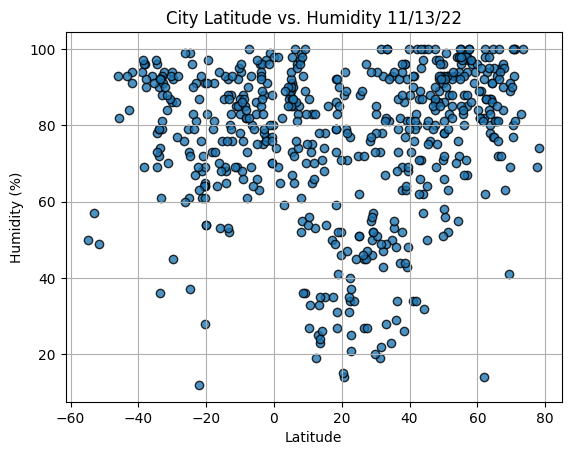

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

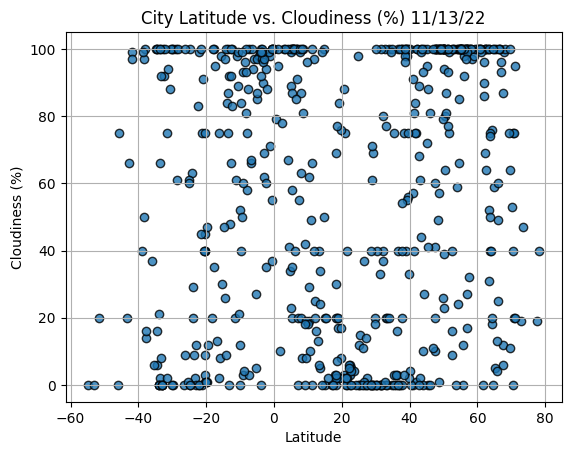

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

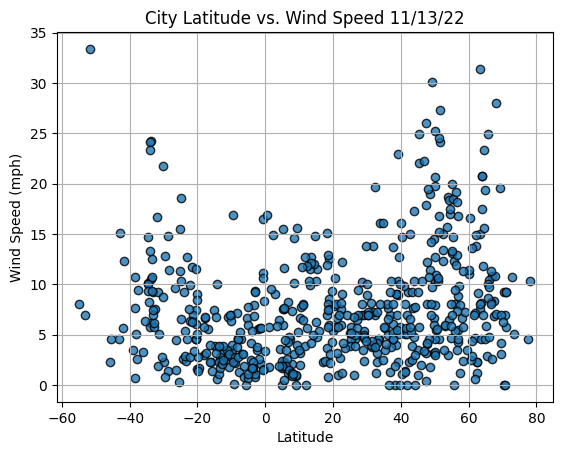

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [36]:
#because we change the Dataframe in cell 14 we retrive the old dataframe from this code
city_data_df=pd.DataFrame(city_data)
new_col_order=["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_col_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marietta,US,2022-11-13 04:36:51,33.9526,-84.5499,41.81,81,100,16.11
1,Voyvozh,RU,2022-11-13 04:38:16,62.8920,54.9635,16.70,94,100,9.17
2,Upernavik,GL,2022-11-13 04:38:17,72.7868,-56.1549,12.20,83,19,10.74
3,Otjiwarongo,NA,2022-11-13 04:38:17,-20.4637,16.6477,59.14,28,1,6.08
4,Hermanus,ZA,2022-11-13 04:38:17,-34.4187,19.2345,56.80,78,6,8.21


In [37]:
index13=city_data_df.loc[13]
index13

City                         Melo
Country                        UY
Date          2022-11-13 04:38:20
Lat                      -32.3667
Lng                      -54.1833
Max Temp                    64.51
Humidity                       94
Cloudiness                     92
Wind Speed                   7.56
Name: 13, dtype: object

In [39]:
#filter the value of the database based on the row
city_data_df["Lat"] >=0

0       True
1       True
2       True
3      False
4      False
       ...  
575     True
576     True
577     True
578    False
579    False
Name: Lat, Length: 580, dtype: bool

In [40]:
#if we want all data with greaterthan 0 latitude we use loc metod
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marietta,US,2022-11-13 04:36:51,33.9526,-84.5499,41.81,81,100,16.11
1,Voyvozh,RU,2022-11-13 04:38:16,62.8920,54.9635,16.70,94,100,9.17
2,Upernavik,GL,2022-11-13 04:38:17,72.7868,-56.1549,12.20,83,19,10.74
5,Rincon,US,2022-11-13 04:38:17,32.2960,-81.2354,69.85,93,40,6.91
6,Yola,NG,2022-11-13 04:38:18,9.2000,12.4833,71.71,36,42,0.92
7,Necocli,CO,2022-11-13 04:38:18,8.4234,-76.7860,74.97,93,100,10.16
8,Oberuzwil,CH,2022-11-13 04:38:18,47.4308,9.1272,41.22,86,60,0.38
9,Abu Samrah,SY,2022-11-13 04:38:19,35.3029,37.1841,58.91,53,3,5.64
10,Yar-Sale,RU,2022-11-13 04:38:19,66.8333,70.8333,-2.96,95,96,10.85
14,Hofn,IS,2022-11-13 04:38:20,64.2539,-15.2082,45.46,91,76,11.83


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))



TypeError: 'tuple' object is not callable

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

TypeError: 'tuple' object is not callable

In [65]:
#linear regression by humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

TypeError: 'tuple' object is not callable

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

TypeError: 'tuple' object is not callable

In [67]:
##linear regression by cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,80))

TypeError: 'tuple' object is not callable

In [68]:
#linear regression by humidity
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

TypeError: 'tuple' object is not callable

In [69]:
#linear regression on wind speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

TypeError: 'tuple' object is not callable

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

TypeError: 'tuple' object is not callable